# Project 3 — Customer Lifetime Value (LTV) Prediction

End‑to‑end predictive modeling project focused on business decision making.

In [1]:

# 1. Imports and configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)


In [2]:

# 2. Load dataset
df = pd.read_csv("project_3_ltv_dataset.csv")
df.head()


,user_id,signup_date,acquisition_channel,activated,orders_90d,revenue_90d,tenure_days,last_activity_days_ago
0,1,2024-04-12,referral,1,2,156.07,96,17
1,2,2024-06-28,paid_search,1,5,57.56,151,14
2,3,2024-04-02,organic,1,1,12.21,121,7
3,4,2024-01-15,paid_search,1,3,221.96,18,23
4,5,2024-04-16,organic,0,0,0.00,88,79


In [3]:

# 3. Basic data inspection
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5000 non-null   int64  
 1   signup_date             5000 non-null   str    
 2   acquisition_channel     5000 non-null   str    
 3   activated               5000 non-null   int64  
 4   orders_90d              5000 non-null   int64  
 5   revenue_90d             5000 non-null   float64
 6   tenure_days             5000 non-null   int64  
 7   last_activity_days_ago  5000 non-null   int64  
dtypes: float64(1), int64(5), str(2)
memory usage: 312.6 KB


In [4]:

# 4. Descriptive statistics
df.describe()


,user_id,activated,orders_90d,revenue_90d,tenure_days,last_activity_days_ago
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.548600,1.231800,59.999242,90.317600,41.860200
std,1443.520003,0.497682,1.571293,105.764621,50.936891,34.859491
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1250.750000,0.000000,0.000000,0.000000,47.000000,14.000000
50%,2500.500000,1.000000,0.000000,0.000000,90.000000,27.000000
75%,3750.250000,1.000000,2.000000,82.555000,134.000000,69.000000
max,5000.000000,1.000000,8.000000,1300.650000,179.000000,119.000000


In [5]:
# 5. Feature / target split (CORRECT)
target = "revenue_90d"

X = df.drop(columns=[target])
y = df[target]


In [6]:
# --- Feature engineering ---

# 1. Convert signup_date to datetime
df["signup_date"] = pd.to_datetime(df["signup_date"])

# 2. Create account age feature
df["account_age_days"] = (pd.Timestamp.today() - df["signup_date"]).dt.days

# 3. Drop raw date and user_id
df = df.drop(columns=["signup_date", "user_id"])

# 4. One-hot encode acquisition channel
df = pd.get_dummies(df, columns=["acquisition_channel"], drop_first=True)

In [7]:
# Target
target = "revenue_90d"

X = df.drop(columns=[target])
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:

# 7. Model training
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [9]:

# 8. Predictions
y_pred = model.predict(X_test)


In [10]:

# 9. Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(39.24844525, 0.44029976730245446)

In [11]:

# 10. Feature importance
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances


orders_90d                         0.533100
account_age_days                   0.153160
tenure_days                        0.149798
last_activity_days_ago             0.102355
acquisition_channel_organic        0.018471
acquisition_channel_referral       0.016124
acquisition_channel_paid_search    0.014847
acquisition_channel_paid_social    0.012145
activated                          0.000000
dtype: float64

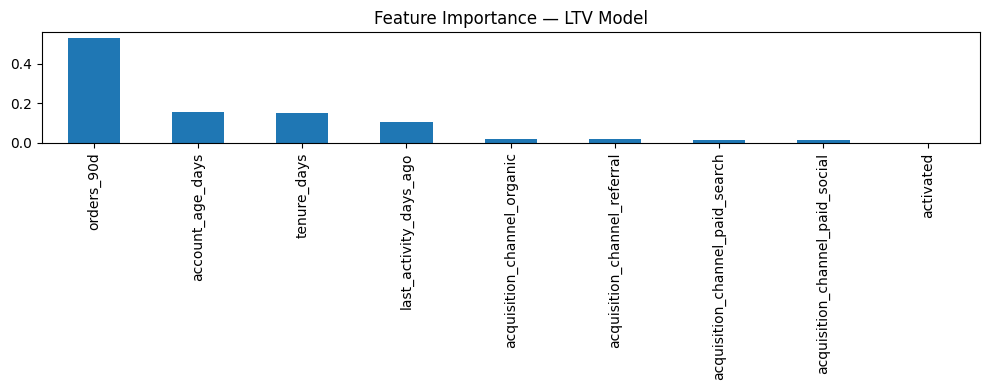

In [12]:

# 11. Plot feature importance
importances.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance — LTV Model")
plt.tight_layout()
plt.show()



## Business Interpretation

- The model predicts **future customer value**, not historical revenue.
- Features with highest importance should guide:
  - Acquisition strategy
  - Retention investments
  - Personalization
- This model can be used to:
  - Prioritize high‑value users
  - Simulate pricing or engagement changes
  - Optimize marketing spend
